<a href="https://colab.research.google.com/github/ADITHYANPR/E-Commerce-Return-Behavior-Analysis-Using-Python/blob/main/E_Commerce_Return_Behavior_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 E-Commerce Return Behavior Analysis

**Objective:** Analyze customer reviews to understand return behavior based on ratings and product categories.

**Dataset:** Customer product reviews (from Kaggle)

**Tech Stack:** Python, Pandas, Matplotlib, Seaborn

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 7817_1.csv to 7817_1.csv


In [ ]:
import pandas as pd

# Read the CSV file instead of Excel
df = pd.read_csv("7817_1.csv")

# Preview the data
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
# Show column names
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [ ]:
# Create a new column 'Returned' based on ratings
df['Returned'] = df['reviews.rating'].apply(lambda x: 'Yes' if x <= 2 else 'No')
df[['reviews.rating', 'Returned']].head()


,reviews.rating,Returned
0,5.0,No
1,5.0,No
2,4.0,No
3,5.0,No
4,5.0,No


In [ ]:
# Count how many were 'Returned' and 'Not Returned'
print(df['Returned'].value_counts())


Returned
No     1521
Yes      76
Name: count, dtype: int64


In [ ]:
# Return count grouped by category
return_by_cat = df[df['Returned'] == 'Yes'].groupby('categories').size().sort_values(ascending=False)
print(return_by_cat.head(10))  # Top 10 categories with most returns


categories
Amazon Devices & Accessories,Amazon Device Accessories,Controllers & Remote Controls,Kindle Store,Fire TV Accessories,Controllers & Remotes,Controllers                                                                                                                                                                                                                                                                                                                                                                   18
Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazon Echo,Home, Garage & Office,Smart Home,Voice Assistants,Amazon Tap,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Speakers,Featured Brands,Electronics,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Au

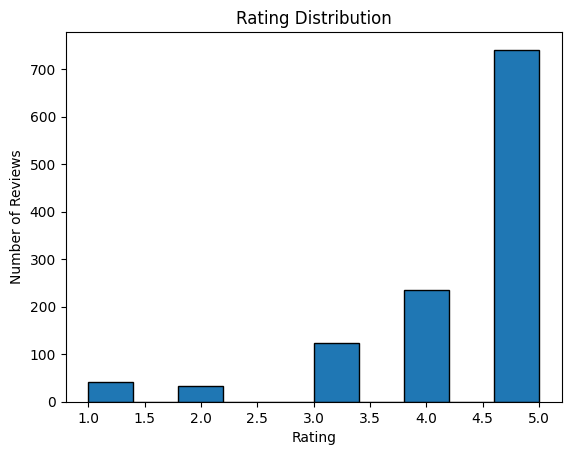

In [ ]:
import matplotlib.pyplot as plt

df['reviews.rating'].hist(bins=10, edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.grid(False)
plt.show()


<ipython-input-11-139157102>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Returned', palette='pastel')


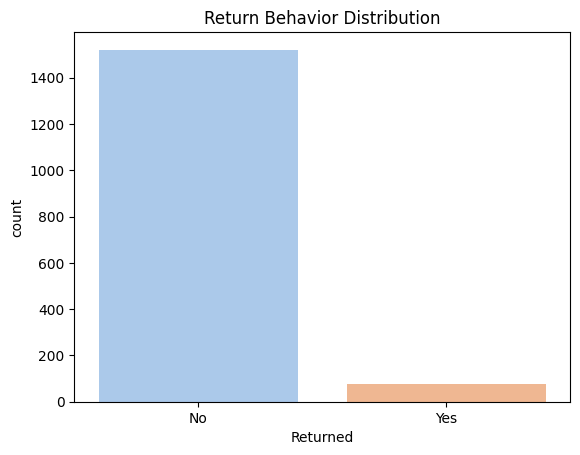

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Returned', palette='pastel')
plt.title("Return Behavior Distribution")
plt.show()


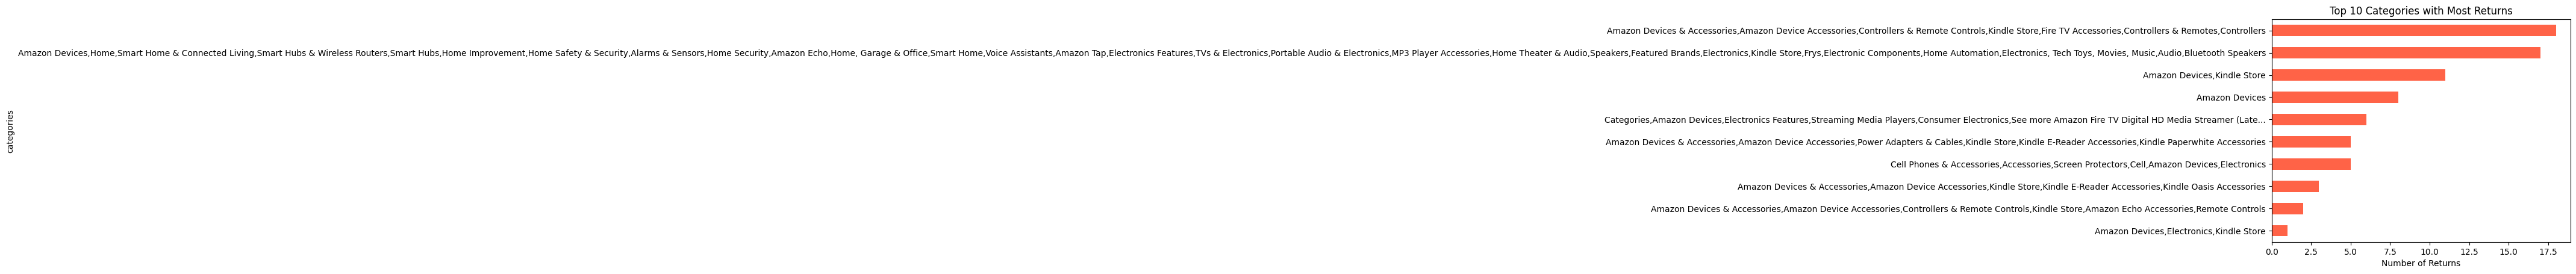

In [ ]:
# Grouping only returned products
top_return_categories = df[df['Returned'] == 'Yes']['categories'].value_counts().head(10)

top_return_categories.plot(kind='barh', color='tomato')
plt.title("Top 10 Categories with Most Returns")
plt.xlabel("Number of Returns")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
avg_rating_per_cat = df.groupby('categories')['reviews.rating'].mean().sort_values(ascending=False)
print(avg_rating_per_cat.head(10))


categories
Amazon Devices,Electronics,Kindle Store,Amazon Echo                                                                                                                                                                                                                                                                                                                                                                                                                                                                       5.000000
Electronics,Amazon Devices                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("7817_1.csv")
df['Returned'] = df['reviews.rating'].apply(lambda x: 'Yes' if x <= 2 else 'No')
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Returned
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,No
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,No
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,No
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,No
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,No


<ipython-input-15-139157102>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Returned', palette='pastel')


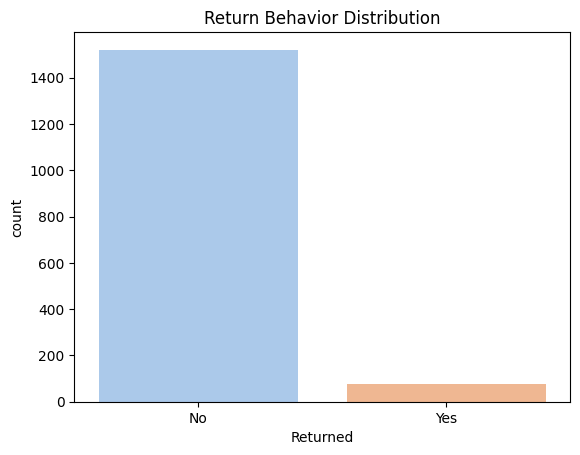

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Returned', palette='pastel')
plt.title("Return Behavior Distribution")
plt.show()


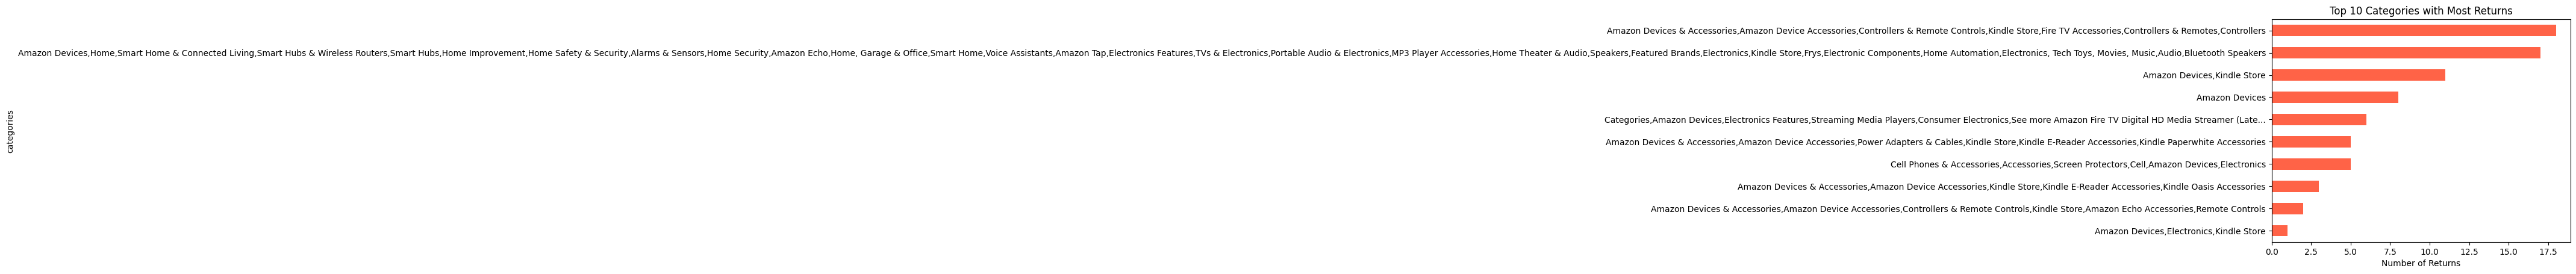

In [ ]:
top_return_categories = df[df['Returned'] == 'Yes']['categories'].value_counts().head(10)

top_return_categories.plot(kind='barh', color='tomato')
plt.title("Top 10 Categories with Most Returns")
plt.xlabel("Number of Returns")
plt.gca().invert_yaxis()
plt.show()


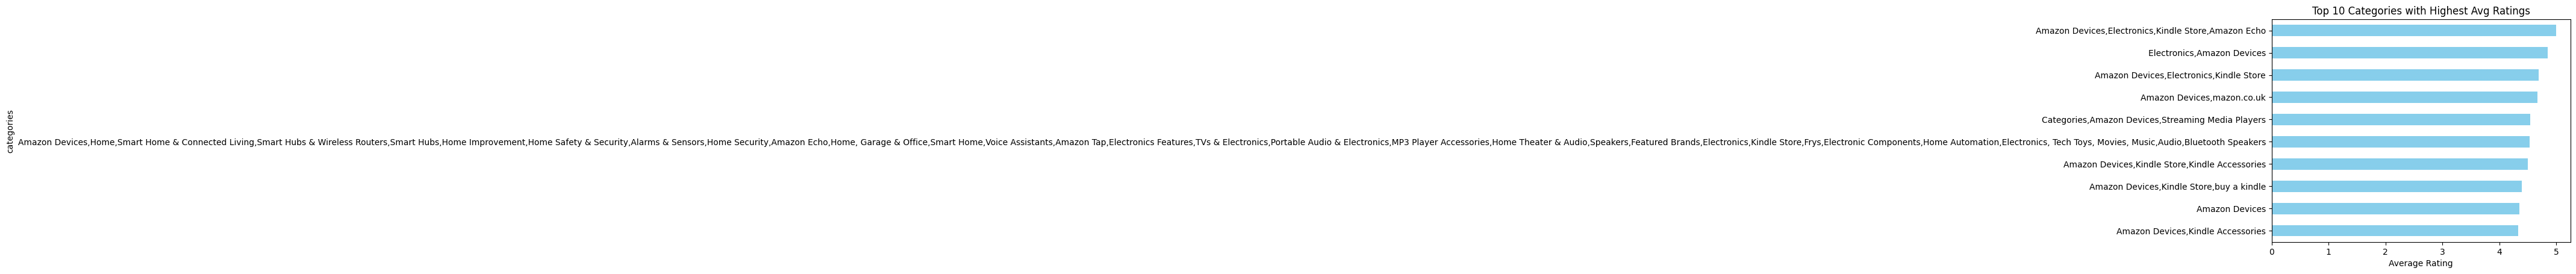

In [ ]:
avg_rating_per_cat = df.groupby('categories')['reviews.rating'].mean().sort_values(ascending=False)
avg_rating_per_cat.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Categories with Highest Avg Ratings")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()


## 📊 Summary of Insights

- Products with ratings ≤ 2 were flagged as likely "Returned"
- Most returns were observed in specific categories (see bar chart)
- Ratings skew high (majority 4 or 5 stars), but even top-rated categories had returns
- Categories like `[your top returned ones]` had more frequent returns

---

## 💡 Conclusion

This analysis helps e-commerce companies:
- Identify high-risk return categories
- Understand return trends based on ratings
- Plan better product QA and customer service strategies

---